# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re # to support modifiers, identifiers or white space char
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Import data

In [3]:
# Read the data, assign column index and modify 'Comment Date' using parse_dates- Pandas will attempt to infer the format of the datetime strings.
df=pd.read_csv(r'/company-review-analysis-master/dataset/company1_review.csv', index_col=[0], parse_dates=['Comment Datetime'])

In [4]:
df.head()

,Con,Career Opportunities,Author Location,Summary,Senior Management,Pro,Recommendation,Culture & Values,Author Years,Overall Rating,Compensation and Benefits,Author Title,Work/Life Balance,Comment Datetime
0,- potentially slow upward movement beyond the ...,5.0,"Salt Lake City, UT","""Awesome Culture""",4.0,- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",5.0,I have been working at Anonymous Investments f...,5.0,5.0,Current Employee - Investment Solutions Repres...,5.0,2020-06-18
1,Few jobs are off the phones. Call after call g...,NaN,NaN,"""Great job""",NaN,"Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",NaN,I have been working at Anonymous Investments f...,5.0,NaN,Current Employee - Investment Solutions Repres...,NaN,2020-06-16
2,"Phone call center, must be good on the phones.",5.0,"American Fork, UT","""Great place to work""",4.0,"Excellent benefits, plenty of opportunity to a...",NaN,5.0,I worked at Anonymous Investments full-time fo...,5.0,5.0,Former Employee - High Net Worth Service Assoc...,5.0,2020-06-17
3,Easy to get fired. They don’t always give warn...,4.0,NaN,"""Good environment, not so stable.""",3.0,"Good environment \n\nNice scenery, cafeteria, ...",Recommends,3.0,I worked at Anonymous Investments full-time,4.0,5.0,Former Employee - Financial Associate,3.0,2020-06-11
4,No cons in my opinion,5.0,"Los Angeles, CA","""Great company""",4.0,Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",5.0,I worked at Anonymous Investments full-time,5.0,4.0,Former Employee - Investment Consultant,5.0,2020-06-11


# Exploratory Data Analysis

In [11]:
df.shape

(6386, 14)

In [12]:
df.columns

Index(['Con', 'Career Opportunities', 'Author Location', 'Summary',
       'Senior Management', 'Pro', 'Recommendation', 'Culture & Values',
       'Author Years', 'Overall Rating', 'Compensation and Benefits',
       'Author Title', 'Work/Life Balance', 'Comment Datetime'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6386 entries, 0 to 6674
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Con                        6386 non-null   object        
 1   Career Opportunities       5689 non-null   float64       
 2   Author Location            3879 non-null   object        
 3   Summary                    6386 non-null   object        
 4   Senior Management          5653 non-null   float64       
 5   Pro                        6386 non-null   object        
 6   Recommendation             5529 non-null   object        
 7   Culture & Values           4871 non-null   float64       
 8   Author Years               6386 non-null   object        
 9   Overall Rating             6386 non-null   float64       
 10  Compensation and Benefits  5697 non-null   float64       
 11  Author Title               5406 non-null   object        
 12  Work/L

In [14]:
df.isnull().sum()

Con                             0
Career Opportunities          697
Author Location              2507
Summary                         0
Senior Management             733
Pro                             0
Recommendation                857
Culture & Values             1515
Author Years                    0
Overall Rating                  0
Compensation and Benefits     689
Author Title                  980
Work/Life Balance             695
Comment Datetime                0
dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(6386, 14)

In [17]:
ratings_col=df.select_dtypes(include='float64')
string_col=df.select_dtypes(exclude='float64')
df_col_sorted=pd.concat([string_col,ratings_col],axis=1)

In [18]:
df_col_sorted.head()

,Con,Author Location,Summary,Pro,Recommendation,Author Years,Author Title,Comment Datetime,Career Opportunities,Senior Management,Culture & Values,Overall Rating,Compensation and Benefits,Work/Life Balance
0,- potentially slow upward movement beyond the ...,"Salt Lake City, UT","""Awesome Culture""",- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-18,5.0,4.0,5.0,5.0,5.0,5.0
1,Few jobs are off the phones. Call after call g...,NaN,"""Great job""","Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-16,NaN,NaN,NaN,5.0,NaN,NaN
2,"Phone call center, must be good on the phones.","American Fork, UT","""Great place to work""","Excellent benefits, plenty of opportunity to a...",NaN,I worked at Anonymous Investments full-time fo...,Former Employee - High Net Worth Service Assoc...,2020-06-17,5.0,4.0,5.0,5.0,5.0,5.0
3,Easy to get fired. They don’t always give warn...,NaN,"""Good environment, not so stable.""","Good environment \n\nNice scenery, cafeteria, ...",Recommends,I worked at Anonymous Investments full-time,Former Employee - Financial Associate,2020-06-11,4.0,3.0,3.0,4.0,5.0,3.0
4,No cons in my opinion,"Los Angeles, CA","""Great company""",Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",I worked at Anonymous Investments full-time,Former Employee - Investment Consultant,2020-06-11,5.0,4.0,5.0,5.0,4.0,5.0


# Print the text of some samples 

In [20]:
for i in range(4,7):
    print("Author Years:",df['Author Years'][i])
    print('Author Title:', df['Author Title'][i])
    print('Author Summary:', df['Summary'][i])
    print('Author Pro:', df['Pro'][i])
    print('Author Con:', df['Con'][i])
    print('====================')

Author Years: I worked at Anonymous Investments full-time
Author Title: Former Employee - Investment Consultant
Author Summary: "Great company"
Author Pro: Good work environment in my opinion
Author Con: No cons in my opinion
Author Years: I have been working at Anonymous Investments full-time
Author Title: Current Employee - Marketing Associate
Author Summary: "Great place to work"
Author Pro: Great benefits, inclusive community, and highly collaborate people to work with.
Author Con: I don’t have any cons
Author Years: I have been working at Anonymous Investments full-time for more than 8 years
Author Title: Current Employee - Senior Software Test Engineer
Author Summary: "Good company to work for"
Author Pro: Good culture and opportunities to grow
Author Con: Moving jobs to offshore for cost savings


# Keyword extraction

In [21]:
def extract_cat_info(row):
#   Extract Current/former employee from Author Years  
    if "worked at" in row['Author Years']:
        row['Current Employee']=0
    elif "work at" in row['Author Years']:
        row['Current Employee']=1
    elif "have been working" in row['Author Years']:
        row['Current Employee']=1
    else:
        row['Current Employee']=np.NaN

# Extract tenure from Author Years
    string_to_number = row["Author Years"].replace("a year", "1 year")  # replace 'a year' with '1 year'
    tenure = re.findall(r'\d+', string_to_number)                       # find the digit in the string
    
    if tenure: 
        row['Tenure'] = int(tenure[0])                 # use the number in the list
        if 'more than' in row["Author Years"]:         
            row['Tenure'] += 0.5                       # add 0.5 year if there is 'more than'
        elif 'less than' in row["Author Years"]:       
            row['Tenure'] -=0.5                        # minus 0.5 year if there is 'less than'
    else:
        row['Tenure'] = np.NaN                         # if no tenure is specified, set to NaN
# Extract full time and part time from Author Years
    if "full-time" in row['Author Years'] or "full time" in row['Author Years']:
        row['Full-Time']=1
    elif "part-time" in row['Author Years'] or "part time" in row['Author Years']:
        row['Full-Time']=0
    else:
        row['Full-Time']=np.NaN

    row['Recommended'] = 0
    row['Positive Outlook'] = 0
    row['Approves of CEO'] = 0
    
    if not pd.isna(row['Recommendation']):  
        if 'Recommends' in row['Recommendation']:
            row['Recommended'] = 1
        elif "Doesn't Recommend" in row['Recommendation']:
            row['Recommended'] = -1
        elif 'Positive Outlook' in row['Recommendation']:
            row['Positive Outlook'] = 1
        elif 'Negative Outlook' in row['Recommendation']:   
            row['Positive Outlook'] = -1
        elif 'Neutral Outlook' in row['Recommendation']: 
            row['Positive Outlook'] = 0
        elif 'Approves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = 1
        elif 'Disapproves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = -1
        elif 'No opinion of CEO' in row['Recommendation']:   
            row['Approves of CEO'] = 0

    return row

df_extract_cat_info=df.apply(extract_cat_info,axis=1)
            

In [22]:
df_extract_cat_info.head()

,Con,Career Opportunities,Author Location,Summary,Senior Management,Pro,Recommendation,Culture & Values,Author Years,Overall Rating,Compensation and Benefits,Author Title,Work/Life Balance,Comment Datetime,Current Employee,Tenure,Full-Time,Recommended,Positive Outlook,Approves of CEO
0,- potentially slow upward movement beyond the ...,5.0,"Salt Lake City, UT","""Awesome Culture""",4.0,- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",5.0,I have been working at Anonymous Investments f...,5.0,5.0,Current Employee - Investment Solutions Repres...,5.0,2020-06-18,1,1.5,1.0,1,0,0
1,Few jobs are off the phones. Call after call g...,NaN,NaN,"""Great job""",NaN,"Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",NaN,I have been working at Anonymous Investments f...,5.0,NaN,Current Employee - Investment Solutions Repres...,NaN,2020-06-16,1,3.5,1.0,1,0,0
2,"Phone call center, must be good on the phones.",5.0,"American Fork, UT","""Great place to work""",4.0,"Excellent benefits, plenty of opportunity to a...",NaN,5.0,I worked at Anonymous Investments full-time fo...,5.0,5.0,Former Employee - High Net Worth Service Assoc...,5.0,2020-06-17,0,5.5,1.0,0,0,0
3,Easy to get fired. They don’t always give warn...,4.0,NaN,"""Good environment, not so stable.""",3.0,"Good environment \n\nNice scenery, cafeteria, ...",Recommends,3.0,I worked at Anonymous Investments full-time,4.0,5.0,Former Employee - Financial Associate,3.0,2020-06-11,0,NaN,1.0,1,0,0
4,No cons in my opinion,5.0,"Los Angeles, CA","""Great company""",4.0,Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",5.0,I worked at Anonymous Investments full-time,5.0,4.0,Former Employee - Investment Consultant,5.0,2020-06-11,0,NaN,1.0,1,0,0


# Extracting more categorical information such as State, Employee Title using Author Location and Job Title resp.

In [23]:
def extract_cat_info2(row):
    # 1. extract location
    if not pd.isna(row['Author Location']):
        if re.search(r'[A-Z]{2}$',row['Author Location']): 
            # extract the last 2 captical letters as state
            row['State'] = re.search(r'[A-Z]{2}$',row['Author Location'])[0]
        else:
            row['State'] = np.NaN      
    else:
            row['State'] = np.NaN                               
    
    # 2. extract job title
    if pd.notnull(row['Author Title']) and row['Author Title']: 
        if '-'in row['Author Title']:  # author title usually starts like this: "Current Employee - Analyst" 
            row['Job Title'] = row['Author Title'].split("-")[1]  # get the 2nd element after the split 
        else:
            row['Job Title'] = row['Author Title']
    else:
         row['Job Title'] = 'Unknown Title'
    # remove "senior" and "principal" to get fewer job categories 
    # remove the beginning & end spaces
    row['Job Title'] = row['Job Title'].replace('Senior',"").replace('Principal',"").strip() 
    
    return row       
df_loc_job_filled = df_extract_cat_info.apply(extract_cat_info2,axis=1) 

In [24]:
df_loc_job_filled.head()

,Con,Career Opportunities,Author Location,Summary,Senior Management,Pro,Recommendation,Culture & Values,Author Years,Overall Rating,...,Work/Life Balance,Comment Datetime,Current Employee,Tenure,Full-Time,Recommended,Positive Outlook,Approves of CEO,State,Job Title
0,- potentially slow upward movement beyond the ...,5.0,"Salt Lake City, UT","""Awesome Culture""",4.0,- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",5.0,I have been working at Anonymous Investments f...,5.0,...,5.0,2020-06-18,1,1.5,1.0,1,0,0,UT,Investment Solutions Representative
1,Few jobs are off the phones. Call after call g...,NaN,NaN,"""Great job""",NaN,"Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",NaN,I have been working at Anonymous Investments f...,5.0,...,NaN,2020-06-16,1,3.5,1.0,1,0,0,NaN,Investment Solutions Representative
2,"Phone call center, must be good on the phones.",5.0,"American Fork, UT","""Great place to work""",4.0,"Excellent benefits, plenty of opportunity to a...",NaN,5.0,I worked at Anonymous Investments full-time fo...,5.0,...,5.0,2020-06-17,0,5.5,1.0,0,0,0,UT,High Net Worth Service Associate
3,Easy to get fired. They don’t always give warn...,4.0,NaN,"""Good environment, not so stable.""",3.0,"Good environment \n\nNice scenery, cafeteria, ...",Recommends,3.0,I worked at Anonymous Investments full-time,4.0,...,3.0,2020-06-11,0,NaN,1.0,1,0,0,NaN,Financial Associate
4,No cons in my opinion,5.0,"Los Angeles, CA","""Great company""",4.0,Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",5.0,I worked at Anonymous Investments full-time,5.0,...,5.0,2020-06-11,0,NaN,1.0,1,0,0,CA,Investment Consultant


# Drop variables

In [25]:
df_cleaned=df_loc_job_filled.drop(columns=['Recommendation','Author Title', 'Author Location','Author Years'])

# Reorder the columns

In [26]:
df_cleaned = df_cleaned[['Comment Datetime', 'State', 'Job Title','Tenure','Current Employee','Full-Time',
                          'Summary','Pro','Con','Recommended', 'Positive Outlook','Approves of CEO',
                          'Overall Rating','Career Opportunities','Compensation and Benefits',
                          'Work/Life Balance','Senior Management','Culture & Values']]

In [27]:
df_cleaned.set_index('Comment Datetime', inplace=True)

# Sort dataframe by index

In [30]:
df_cleaned=df_cleaned.sort_index()

In [31]:
df_cleaned.head(1)

,State,Job Title,Tenure,Current Employee,Full-Time,Summary,Pro,Con,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
Comment Datetime,,,,,,,,,,,,,,,,,
2008-06-11,MA,Director,NaN,1,NaN,"""very political""",privately owned company that can look at long ...,risk averse management that does not know how ...,-1,0,0,2.0,2.0,2.5,3.5,2.5,NaN


# Check missing values

In [32]:
df_cleaned.isnull().sum()

State                        3389
Job Title                       0
Tenure                       2847
Current Employee                0
Full-Time                    2006
Summary                         0
Pro                             0
Con                             0
Recommended                     0
Positive Outlook                0
Approves of CEO                 0
Overall Rating                  0
Career Opportunities          697
Compensation and Benefits     689
Work/Life Balance             695
Senior Management             733
Culture & Values             1515
dtype: int64

In [33]:
df_cleaned.describe()

,Tenure,Current Employee,Full-Time,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
count,3539.000000,6386.00000,4380.000000,6386.000000,6386.000000,6386.000000,6386.000000,5689.000000,5697.000000,5691.000000,5653.000000,4871.000000
mean,4.409296,0.56248,0.990411,0.424679,0.003288,0.015346,3.712809,3.427140,3.832631,3.724653,3.226605,3.845001
std,3.450280,0.49612,0.097464,0.790138,0.081998,0.158545,1.110729,1.177508,1.013139,1.145637,1.259235,1.225665
min,0.500000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,0.00000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,3.500000,1.00000,1.000000,1.000000,0.000000,0.000000,4.000000,3.500000,4.000000,4.000000,3.000000,4.000000
75%,5.500000,1.00000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
max,10.500000,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Plot all ratings columns

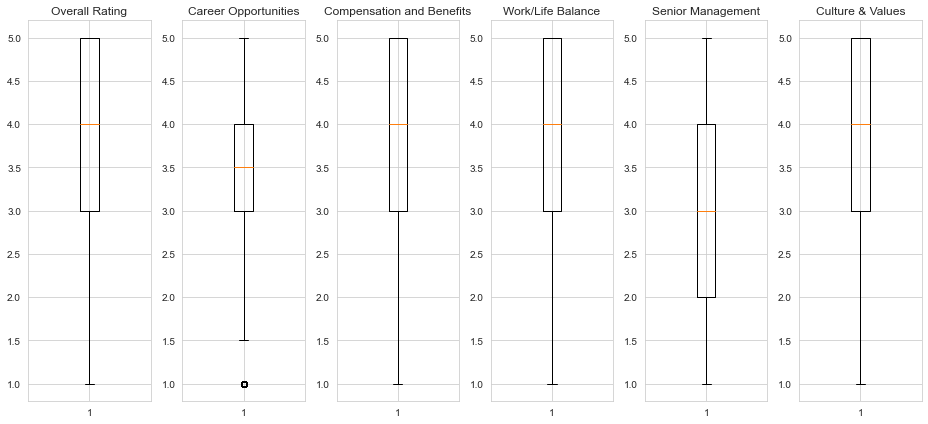

In [34]:
col_list=['Overall Rating','Career Opportunities','Compensation and Benefits','Work/Life Balance','Senior Management','Culture & Values']

figure,axis=plt.subplots(1,6,figsize=(13,6))

for column,curr_ax in zip(col_list,axis.ravel()):
    curr_ax.boxplot(df_cleaned[column].dropna())
    curr_ax.set_title(f'{column}')
plt.tight_layout()
plt.show()

#### On a scale of 1-5, the company's median overall rating is 4 which is pretty good.  Breaking down to 5 categories, employees rated the highest in compensation & benefits, work/life balance and culture & values. Senior management rating's median value is 3, which is the lowest, and career opportunities'median rating is 3.5. Culture & Values has a median rating as 4.  There are a few outliers in career opportunities and culture & values.

# Plot overall rating over the years

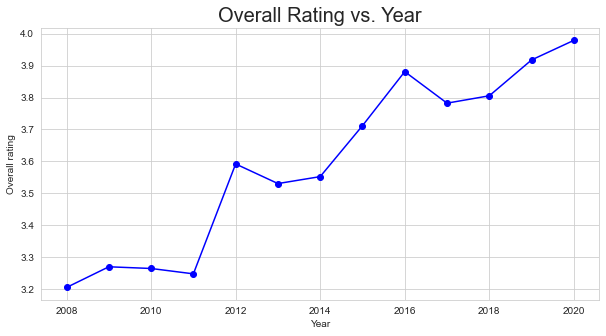

In [35]:
from datetime import datetime
fig,ax = plt.subplots(figsize=(10,5))

x = sorted(df_cleaned.index.year.unique())
y = df_cleaned.groupby(df_cleaned.index.year)['Overall Rating'].mean()

ax.plot(x, y, color='blue', marker = 'o',label='Overall Rating')
ax.set_title('Overall Rating vs. Year', fontsize=20)
ax.set_xlabel('Year')
ax.set_ylabel('Overall rating')
# plt.savefig('overall_rating_vs_year.png')

plt.show()  

# Plot recommendation

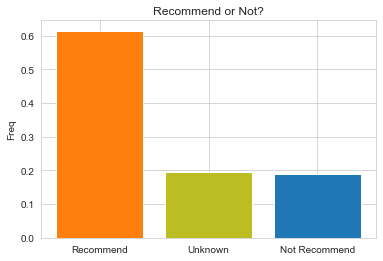

In [36]:
reco_count=df_cleaned['Recommended'].value_counts(normalize=True)

fig,ax=plt.subplots()
ax.bar(['Recommend','Unknown','Not Recommend'],reco_count, color=['tab:orange','tab:olive','tab:blue'])
ax.set_title('Recommend or Not?')
ax.set_ylabel('Freq')

plt.show()

# Plot sub-categories average ratings

<ipython-input-37-99ec1da54552>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_ratings.index,rotation=45)


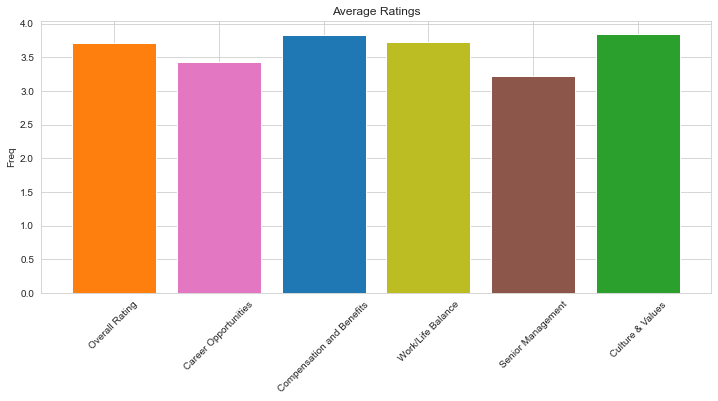

In [37]:
column_list = ['Overall Rating','Career Opportunities','Compensation and Benefits',
               'Work/Life Balance','Senior Management','Culture & Values']

avg_ratings=df_cleaned[column_list].mean()
color_code=['tab:orange','tab:pink','tab:blue','tab:olive','tab:brown','tab:green']

fig,ax=plt.subplots(figsize=(12,5))
ax.bar(avg_ratings.index, avg_ratings,color=color_code)
ax.set_title('Average Ratings')
ax.set_ylabel('Freq')
ax.set_xticklabels(avg_ratings.index,rotation=45)
plt.show()


# Plot the 10 states with top ratings

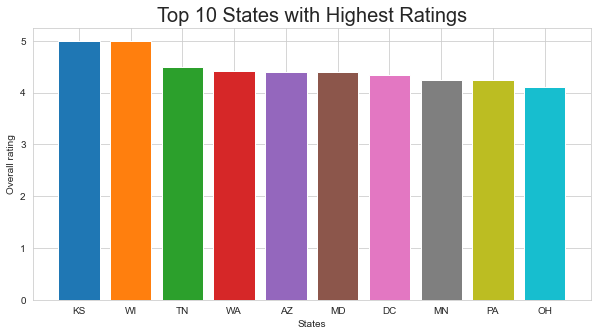

In [38]:
top_10 = df_cleaned.groupby('State')['Overall Rating'].mean().nlargest(10)
colors2 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
           'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(top_10.index,top_10, color=colors2)
ax.set_title('Top 10 States with Highest Ratings', fontsize=20)
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
# plt.savefig('top10_states_high_rate.png')

plt.show()

# Plot the 5 states with lowest ratings

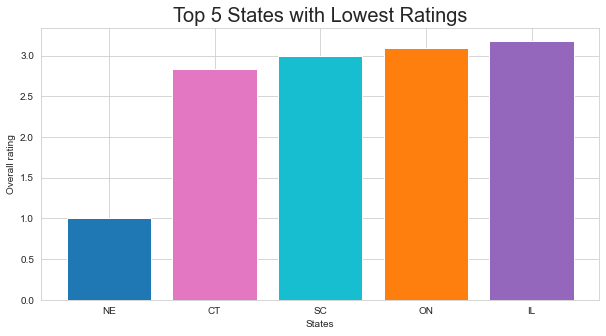

In [39]:
 lowest_5 = df_cleaned.groupby('State')['Overall Rating'].mean().nsmallest(5)
colors3 = ['tab:blue','tab:pink','tab:cyan','tab:orange','tab:purple']

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(lowest_5.index,lowest_5, color=colors3)
ax.set_title('Top 5 States with Lowest Ratings',fontsize=20)
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
# plt.savefig('top5_states_low_rate.png')

plt.show()

In [40]:
# check how many employees submitted feedback in NE since its rating is so low
len(df_cleaned.loc[df_cleaned.State=='NE'])

1

#### There is actually only 1 employee in NE submitted feedback to Glassdoor.

#### Looks like employees in KS and WI have the highest employee satisfaction and employees in NE (only 1 submitted review) are the unhappiest. Of note, the location data indicates 'Author Location', we assumed these employees are based locally in the company's branches in that particular state. If there are substantial remote employees, this conclusion may not be accurate.

# Plot overall rating by full-time/part-time employee

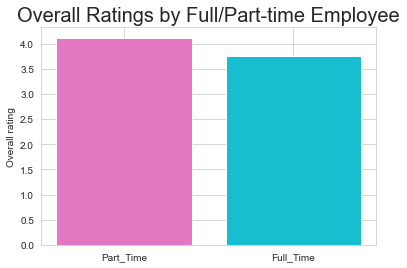

In [41]:
rate_by_fte = df_cleaned.groupby('Full-Time')['Overall Rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Part_Time', 'Full_Time'], rate_by_fte,color=['tab:pink','tab:cyan'])
ax.set_title('Overall Ratings by Full/Part-time Employee', fontsize=20)
ax.set_ylabel('Overall rating')
# plt.savefig('rating_by_fulltime_parttime.png')

plt.show()

# Plot overall rating by current/former employee

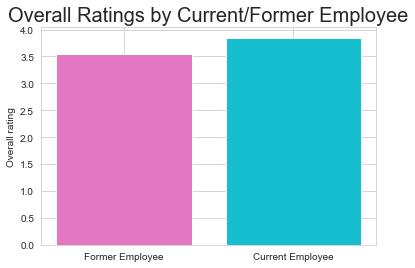

In [42]:
rat_by_emp_type=df_cleaned.groupby('Current Employee')['Overall Rating'].mean()

color_emp_type=['tab:pink','tab:cyan']
fig,ax=plt.subplots()
ax.bar(['Former Employee', 'Current Employee'], rat_by_emp_type,color=['tab:pink','tab:cyan'])
ax.set_title('Overall Ratings by Current/Former Employee', fontsize=20)
ax.set_ylabel('Overall rating')
plt.show()

# Plot the most frenquest reviewer job titles

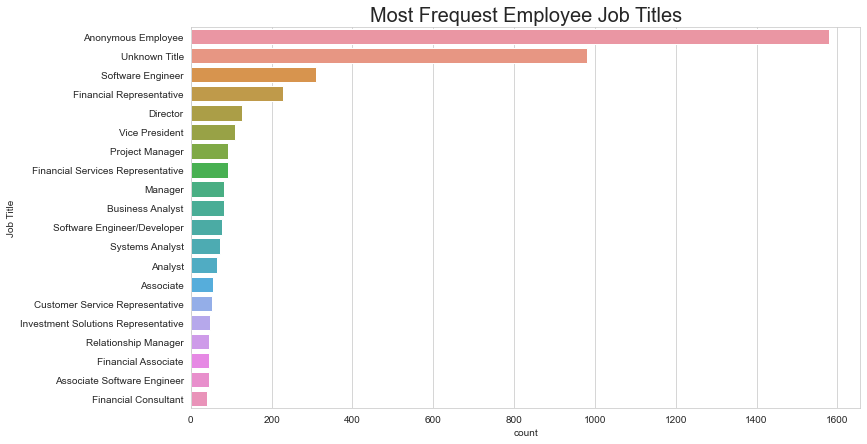

In [43]:
top_20_job = df_cleaned['Job Title'].value_counts().nlargest(20)

plt.figure(figsize=(12,7))
sns.countplot(y='Job Title',data=df_cleaned, order=top_20_job.index)
sns.set_context('talk')
plt.title('Most Frequest Employee Job Titles', fontsize=20)
# figure.savefig('most_freq_job_title.png',bbox_inches = 'tight')

plt.show()

# Plot the reviewers in the top 20 job families' overall rating

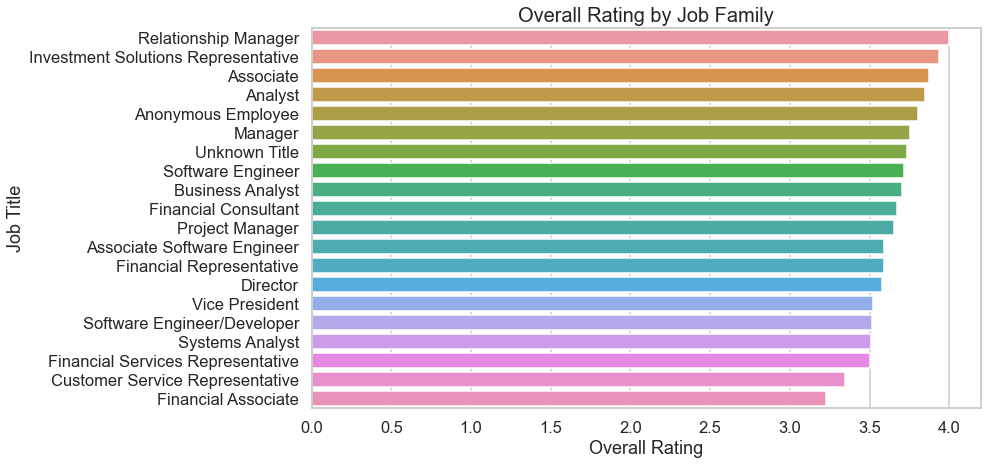

In [44]:
top_20job_review = df_cleaned.loc[df_cleaned['Job Title'].isin(top_20_job.index), ['Job Title','Overall Rating']]
top_20job_mean_review = top_20job_review.groupby('Job Title')['Overall Rating'].mean().sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(y=top_20job_mean_review.index, x=top_20job_mean_review, hue_order=top_20job_mean_review)
sns.set_context('talk')
plt.title('Overall Rating by Job Family', fontsize=20)
# figure.savefig('rating_by_job_family.png',bbox_inches = 'tight')

plt.show()

# Export cleaned data

In [45]:
df_cleaned.to_csv(r'/company-review-analysis-master/dataset/df_cleaned1.csv')